# Confusion matrix analyser
All of the edge detection evaluated for our 'SAR Image Edge Detection: Review and Benchmark Experiments' paper calculate the confusion matrix for 21 thresholds for every image and store the results in confusion matrixes. All these confusion matrices are stored in Panda dataframes. This notebook helps to analyse these confusion matrices and calculate the average measurements and ROC curves.

If you all of the cells of this notebook, it should show the ROC curve and save the F1 threshold in 'F1_thresholds.xlsx', the metrics are saved in 'metric_scores_with_F1_threshold.xlsx'.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import auc

from utils_confusion_matrix_analyser import *

## Demonstration
THe following simple cell demonstrates how to create metrics for an algorithm from a dataframe with confusion matrices. This dataframe can be created with ../detection_on_training_data.py or ../canny_on_training_data.py for Canny

In [2]:
edge_algorithm = input('Please input the name of the algorithm you would like to evaluate (case sensitive)')
df = pd.read_csv(f'confusion_matrices/{edge_algorithm}_measures.csv')
print(f'{edge_algorithm} confusion matrices')

# Drop columns with no confusion matrixes
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.loc[:, ~df.columns.str.contains('Image number name')]
df

Please input the name of the algorithm you would like to evaluate (case sensitive)farid
farid confusion matrices


,thresh=0.0,thresh=0.05,thresh=0.1,thresh=0.15,thresh=0.2,thresh=0.25,thresh=0.3,thresh=0.35,thresh=0.4,thresh=0.45,...,thresh=0.55,thresh=0.6,thresh=0.65,thresh=0.7,thresh=0.75,thresh=0.8,thresh=0.85,thresh=0.9,thresh=0.95,thresh=1.0
0,"{'tn': 0, 'fp': 194027, 'fn': 0, 'tp': 14869}","{'tn': 43767, 'fp': 150260, 'fn': 1995, 'tp': ...","{'tn': 109399, 'fp': 84628, 'fn': 5541, 'tp': ...","{'tn': 149912, 'fp': 44115, 'fn': 8335, 'tp': ...","{'tn': 170376, 'fp': 23651, 'fn': 10453, 'tp':...","{'tn': 181082, 'fp': 12945, 'fn': 12043, 'tp':...","{'tn': 186834, 'fp': 7193, 'fn': 12984, 'tp': ...","{'tn': 189963, 'fp': 4064, 'fn': 13577, 'tp': ...","{'tn': 191794, 'fp': 2233, 'fn': 14093, 'tp': ...","{'tn': 192689, 'fp': 1338, 'fn': 14470, 'tp': ...",...,"{'tn': 193582, 'fp': 445, 'fn': 14770, 'tp': 99}","{'tn': 193775, 'fp': 252, 'fn': 14826, 'tp': 43}","{'tn': 193896, 'fp': 131, 'fn': 14851, 'tp': 18}","{'tn': 193970, 'fp': 57, 'fn': 14859, 'tp': 10}","{'tn': 194005, 'fp': 22, 'fn': 14865, 'tp': 4}","{'tn': 194022, 'fp': 5, 'fn': 14867, 'tp': 2}","{'tn': 194024, 'fp': 3, 'fn': 14869, 'tp': 0}","{'tn': 194026, 'fp': 1, 'fn': 14869, 'tp': 0}","{'tn': 194026, 'fp': 1, 'fn': 14869, 'tp': 0}","{'tn': 194026, 'fp': 1, 'fn': 14869, 'tp': 0}"
1,"{'tn': 0, 'fp': 192956, 'fn': 0, 'tp': 15940}","{'tn': 64429, 'fp': 128527, 'fn': 2331, 'tp': ...","{'tn': 125429, 'fp': 67527, 'fn': 7105, 'tp': ...","{'tn': 163535, 'fp': 29421, 'fn': 11420, 'tp':...","{'tn': 180023, 'fp': 12933, 'fn': 13856, 'tp':...","{'tn': 185926, 'fp': 7030, 'fn': 14969, 'tp': ...","{'tn': 188292, 'fp': 4664, 'fn': 15479, 'tp': ...","{'tn': 189506, 'fp': 3450, 'fn': 15756, 'tp': ...","{'tn': 190394, 'fp': 2562, 'fn': 15853, 'tp': 87}","{'tn': 191052, 'fp': 1904, 'fn': 15890, 'tp': 50}",...,"{'tn': 192046, 'fp': 910, 'fn': 15927, 'tp': 13}","{'tn': 192404, 'fp': 552, 'fn': 15933, 'tp': 7}","{'tn': 192639, 'fp': 317, 'fn': 15936, 'tp': 4}","{'tn': 192770, 'fp': 186, 'fn': 15938, 'tp': 2}","{'tn': 192842, 'fp': 114, 'fn': 15940, 'tp': 0}","{'tn': 192879, 'fp': 77, 'fn': 15940, 'tp': 0}","{'tn': 192914, 'fp': 42, 'fn': 15940, 'tp': 0}","{'tn': 192935, 'fp': 21, 'fn': 15940, 'tp': 0}","{'tn': 192950, 'fp': 6, 'fn': 15940, 'tp': 0}","{'tn': 192955, 'fp': 1, 'fn': 15940, 'tp': 0}"
2,"{'tn': 0, 'fp': 186354, 'fn': 0, 'tp': 22542}","{'tn': 49714, 'fp': 136640, 'fn': 1076, 'tp': ...","{'tn': 95070, 'fp': 91284, 'fn': 3179, 'tp': 1...","{'tn': 123907, 'fp': 62447, 'fn': 5635, 'tp': ...","{'tn': 144234, 'fp': 42120, 'fn': 8262, 'tp': ...","{'tn': 158516, 'fp': 27838, 'fn': 10970, 'tp':...","{'tn': 168664, 'fp': 17690, 'fn': 13519, 'tp':...","{'tn': 175473, 'fp': 10881, 'fn': 15882, 'tp':...","{'tn': 179768, 'fp': 6586, 'fn': 17857, 'tp': ...","{'tn': 182527, 'fp': 3827, 'fn': 19472, 'tp': ...",...,"{'tn': 185226, 'fp': 1128, 'fn': 21512, 'tp': ...","{'tn': 185834, 'fp': 520, 'fn': 22051, 'tp': 491}","{'tn': 186089, 'fp': 265, 'fn': 22304, 'tp': 238}","{'tn': 186242, 'fp': 112, 'fn': 22434, 'tp': 108}","{'tn': 186308, 'fp': 46, 'fn': 22492, 'tp': 50}","{'tn': 186330, 'fp': 24, 'fn': 22519, 'tp': 23}","{'tn': 186344, 'fp': 10, 'fn': 22538, 'tp': 4}","{'tn': 186352, 'fp': 2, 'fn': 22540, 'tp': 2}","{'tn': 186353, 'fp': 1, 'fn': 22541, 'tp': 1}","{'tn': 186353, 'fp': 1, 'fn': 22542, 'tp': 0}"
3,"{'tn': 0, 'fp': 190950, 'fn': 0, 'tp': 17946}","{'tn': 71052, 'fp': 119898, 'fn': 1823, 'tp': ...","{'tn': 138523, 'fp': 52427, 'fn': 5359, 'tp': ...","{'tn': 168795, 'fp': 22155, 'fn': 8468, 'tp': ...","{'tn': 180980, 'fp': 9970, 'fn': 11207, 'tp': ...","{'tn': 185750, 'fp': 5200, 'fn': 13562, 'tp': ...","{'tn': 188127, 'fp': 2823, 'fn': 15064, 'tp': ...","{'tn': 189348, 'fp': 1602, 'fn': 16131, 'tp': ...","{'tn': 190084, 'fp': 866, 'fn': 16792, 'tp': 1...","{'tn': 190466, 'fp': 484, 'fn': 17240, 'tp': 706}",...,"{'tn': 190794, 'fp': 156, 'fn': 17710, 'tp': 236}","{'tn': 190847, 'fp': 103, 'fn': 17807, 'tp': 139}","{'tn': 190905, 'fp': 45, 'fn': 17880, 'tp': 66}","{'tn': 190931, 'fp': 19, 'fn': 1790

## ROC curves and AUC from confusion matrices

Farid is done, AUC=0.6814782160716495, 

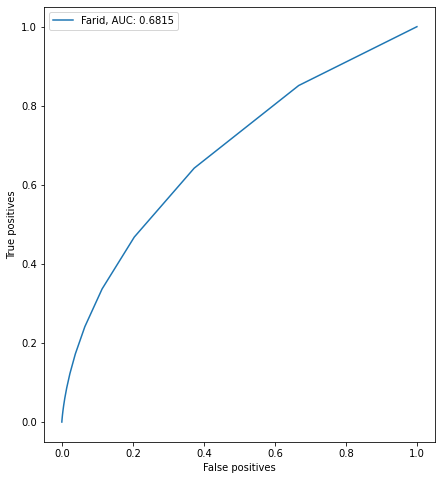

{'farid': 0.6814782160716495}

In [3]:
# Please note that instead of the input edge algortihm you could add
# a list of edge algorithms and plot them all at one ROC curve
plot_ROC_algorithms([edge_algorithm], [edge_algorithm.capitalize()])

## Further metrics from confusion matrices

In [4]:
def keywithmaxval(d):
    """ This function is copied from https://stackoverflow.com/a/12343826
    a) create a list of the dict's keys and values; 
    b) return the key with the max value"""  
    v=list(d.values())
    k=list(d.keys())
    return k[v.index(max(v))]

def threshold_finder(list_methods):
    ''' 
    Evaluates methods and saves their optimal thresholds regarding the F1
    metric in a xlsx file.
    param list_methods: should be a list of all the methods to be evaluated
    param name: decides how the files are saved
    param measures_list: decides for which metrics the optimal thresholds are found
    '''
    # Create df for the thresholds that produce the highest mean scores for given metrics
    df_thresh = pd.DataFrame()
                     
    for edge_detector in list_methods:
        if 'DoG' not in edge_detector or 'LoG' not in edge_detector:
            # Get F1 scores for the current edge_detector
            df_temp = create_measurements(edge_detector, F1)

            # Get a dictionary with all the average F1 scores for every threshold
            mean_df_dict = {column:np.mean(df_temp[column]) for column in df_temp}    

            # Get the best threshold, if multiple thresholds give the same response 
            best_thresh = keywithmaxval(mean_df_dict)

            # Add the threshold and the edge detector to the dataframe
            df_thresh[edge_detector] = [best_thresh]
            print(edge_detector, 'done')

    # Save the thresholds
    df_thresh.to_excel('F1_thresholds.xlsx')
    return df_thresh
                

In [5]:
# Save optimal thresholds for all the methods (except voting, LoG and DoG)
threshold_finder([edge_algorithm])

farid done


,farid
0,thresh=0.15


In [6]:
def metric_evaluator(list_methods, metric_list=[ACC, F1, PPV, FM, MK]):
    metrics_df = pd.DataFrame()
   
    # Set index
    metrics_df['Name'] = list_methods
    metrics_df.set_index('Name')
    
    # Retrieve the thresholds based on highest F1 average
    thresholds_df = pd.read_excel('F1_thresholds.xlsx')

    for metric in metric_list:
        metric_scores = []
        for edge_detector in list_methods:
            # Calculate the scores of the metrics
            temp_df = create_measurements(edge_detector, metric)

            if 'DoG' in edge_detector or 'LoG' in edge_detector:
                # Don't use a threshold, but the zero-crossing response 
                metric_score = np.mean(temp_df['zc'])
            else:
                # Get the average metric score for F1 threshold
                temp_threshold = thresholds_df[edge_detector][0]
                metric_score = np.mean(temp_df[temp_threshold])
            
            # Add the average metric score to the metric scores list
            metric_scores.append(metric_score)
        # Add the scores for the current metric to the dataframe
        metrics_df[metric.__name__] = metric_scores
        print(f'Metric {metric.__name__} done')
    metrics_df.to_excel('metric_scores_with_F1_threshold.xlsx')

In [7]:
metric_evaluator([edge_algorithm])

Metric ACC done
Metric F1 done
Metric PPV done
Metric FM done
Metric MK done
